In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [9]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,300,100)

Vizualize data

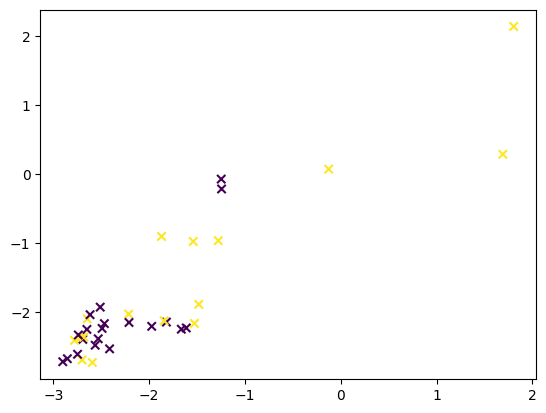

In [10]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(4,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_3732\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

Epoch 1/15
1/1 [==============================] - 1s 586ms/step - loss: 0.2884 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2850 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2833 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2816 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2799 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2767 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2751 - accuracy: 0.6071
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2736 - accuracy: 0.6071
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 112ms/step - loss: 0.4099 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 516ms/step - loss: 0.2019 - accuracy: 0.7143
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2006 - accuracy: 0.7143
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1993 - accuracy: 0.7143
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1981 - accuracy: 0.7143
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1968 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1944 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1931 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1919 - accuracy: 0.7143
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2298 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2379 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 527ms/step - loss: 0.2222 - accuracy: 0.6786
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2206 - accuracy: 0.6786
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.6786
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2174 - accuracy: 0.7143
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2160 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2145 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2131 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2117 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3592 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3572 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3551 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3530 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3510 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3489 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3469 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3449 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3429 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.2678 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2664 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2649 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2635 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2621 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2607 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2593 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2480 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.3493 - accuracy: 0.3214
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3478 - accuracy: 0.3214
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.4643
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2505 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 512ms/step - loss: 0.2402 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2379 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2356 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2334 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2289 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.6429
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.1875 - accuracy: 0.8571
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1863 - accuracy: 0.8571
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1850 - accuracy: 0.8571
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1838 - accuracy: 0.8571
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1827 - accuracy: 0.8571
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1815 - accuracy: 0.8571
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1804 - accuracy: 0.8571
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.8571
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1781 - accuracy: 0.8571
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1769 - accuracy: 0.8571
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.3571
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2987 - accuracy: 0.3571
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.3571
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2956 - accuracy: 0.3571
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2941 - accuracy: 0.3571
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2926 - accuracy: 0.3571
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2911 - accuracy: 0.3571
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.3571
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2041 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 603ms/step - loss: 0.3717 - accuracy: 0.2500
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.3230 - accuracy: 0.4286
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3216 - accuracy: 0.4286
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.4286
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2409 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 564ms/step - loss: 0.2278 - accuracy: 0.6786
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.6786
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.6786
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.6786
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2226 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2213 - accuracy: 0.7143
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 607ms/step - loss: 0.3571 - accuracy: 0.4643
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3555 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3524 - accuracy: 0.4643
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 0.4643
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3493 - accuracy: 0.4643
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3447 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3432 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2996 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2900 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2884 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.1973 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.4286
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.4286
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2871 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2860 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2621 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 539ms/step - loss: 0.2607 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2562 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.6071
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 126ms/step - loss: 0.6187 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 565ms/step - loss: 0.3064 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3050 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3035 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3006 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2992 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2978 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.6429
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2222 - accuracy: 0.6786
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 0.6786
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2192 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 26ms/step - loss: 0.2177 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 13ms/step - loss: 0.2162 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 19ms/step - loss: 0.2147 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2132 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 12ms/step - loss: 0.2118 - accuracy: 0.6786
Epoch 15/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2299 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2265 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2254 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2563 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 555ms/step - loss: 0.2930 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2883 - accuracy: 0.5357
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 121ms/step - loss: 0.2437 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.2856 - accuracy: 0.3929
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2841 - accuracy: 0.3929
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2826 - accuracy: 0.3929
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.3929
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.3929
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.3929
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.3929
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2754 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.1914 - accuracy: 0.7143
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1904 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1894 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1885 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1874 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1863 - accuracy: 0.7143
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1853 - accuracy: 0.7143
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1842 - accuracy: 0.7143
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1831 - accuracy: 0.7500
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1820 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2230 - accuracy: 0.6786
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.6786
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.6786
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.3809 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 615ms/step - loss: 0.2941 - accuracy: 0.4643
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2921 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2901 - accuracy: 0.5000
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 8ms/step - loss: 0.3431 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.1714 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 546ms/step - loss: 0.3128 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3107 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3022 - accuracy: 0.4643
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.4643
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2981 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================

In [12]:
dwt_test_classifiers(1,'db2',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 638ms/step - loss: 0.3367 - accuracy: 0.4643
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3337 - accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3322 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3308 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3293 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3279 - accuracy: 0.5357
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3264 - accuracy: 0.5357
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3250 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3235 - accuracy: 0.5357
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 0.2826 - accuracy: 0.4643
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2808 - accuracy: 0.4643
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2790 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 19ms/step - loss: 0.2772 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================] - 0s 35ms/step - loss: 0.2754 - accuracy: 0.4643
Epoch 11/15
1/1 [==============================] - 0s 17ms/step - loss: 0.2736 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 28ms/step - loss: 0.2718 - accuracy: 0.4643
Epoch 13/15
1/1 [==============================] - 0s 19ms/step - loss: 0.2701 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 16ms/step - loss: 0.2683 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 248ms/step - loss: 0.2244 - accuracy: 0.3750
Epoch 1/15
1/1 [=====================

1/1 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3270 - accuracy: 0.4643
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3231 - accuracy: 0.4643
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2961 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 498ms/step - loss: 0.2689 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2646 - accuracy: 0.5000
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 119ms/step - loss: 0.2295 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 500ms/step - loss: 0.3133 - accuracy: 0.4643
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.4643
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.4643
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.4643
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.4643
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.4643
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.4643
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3009 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2991 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3488 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3467 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3446 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3405 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3384 - accuracy: 0.4286
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.4286
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3343 - accuracy: 0.4286
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.4286
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3302 - accuracy: 0.4286
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2826 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2787 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2768 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2910 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 530ms/step - loss: 0.2686 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2666 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2645 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.5000
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 111ms/step - loss: 0.2391 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 488ms/step - loss: 0.2309 - accuracy: 0.6071
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2300 - accuracy: 0.6071
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.6071
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.6429
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2273 - accuracy: 0.6429
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.6429
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.6429
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.6429
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.6786
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.6071
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2611 - accuracy: 0.6071
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.6071
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.6071
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2580 - accuracy: 0.6071
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.6071
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2560 - accuracy: 0.6071
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2550 - accuracy: 0.6071
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.6786
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.6786
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2920 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2897 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2885 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2873 - accuracy: 0.6071
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2087 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 510ms/step - loss: 0.2259 - accuracy: 0.6786
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2247 - accuracy: 0.6786
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2234 - accuracy: 0.7143
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2279 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 573ms/step - loss: 0.2959 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2925 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2874 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2857 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2840 - accuracy: 0.5714
Epoch 9/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3112 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3083 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3026 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.2994 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.4643
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2928 - accuracy: 0.4643
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2896 - accuracy: 0.4643
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3148 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 527ms/step - loss: 0.2239 - accuracy: 0.6429
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2226 - accuracy: 0.6429
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.6071
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.6071
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3130 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 590ms/step - loss: 0.2469 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2457 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2444 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2407 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2395 - accuracy: 0.5714
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3137 - accuracy: 0.2857
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.2857
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.2857
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.2857
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.2857
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.2857
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3019 - accuracy: 0.3214
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2999 - accuracy: 0.3214
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.3571
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2961 - accuracy: 0.3571
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2544 - accuracy: 0.4643
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.5357
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.5357
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2482 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2452 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2436 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.1689 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 1s 548ms/step - loss: 0.2951 - accuracy: 0.4286
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.4286
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.4286
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2972 - accuracy: 0.4286
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2808 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 538ms/step - loss: 0.2717 - accuracy: 0.5357
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2704 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2679 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.5357
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.5357
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 549ms/step - loss: 0.2383 - accuracy: 0.6429
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2365 - accuracy: 0.6429
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2349 - accuracy: 0.6429
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2332 - accuracy: 0.6429
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.6429
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2298 - accuracy: 0.6429
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2281 - accuracy: 0.6429
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.6429
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2248 - accuracy: 0.6429
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2232 - accuracy: 0.6429
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3090 - accuracy: 0.4643
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.4643
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3059 - accuracy: 0.4643
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.4643
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.4643
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.4643
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.4643
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.4643
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.4643
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2196 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.5357
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.5357
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2778 - accuracy: 0.5357
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.5357
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2157 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 492ms/step - loss: 0.3030 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.5357
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3002 - accuracy: 0.5357
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2988 - accuracy: 0.5357
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.5357
Epoch 6/15
1/1 [===========================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,300,0)

In [14]:
csp_test_classifiers(8,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 0s 483ms/step - loss: 0.3122 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3111 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3088 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3076 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.5625
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 9ms/step - loss: 0.3615 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3604 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3592 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3581 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3559 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3548 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3526 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 133ms/step - loss: 0.2512 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2828 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.4688
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2789 - accuracy: 0.4688
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.3567 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 479ms/step - loss: 0.2955 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2944 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2933 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2922 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2911 - accuracy: 0.5312
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 123ms/step - loss: 0.2317 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 492ms/step - loss: 0.2392 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2369 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2362 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2347 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2331 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3463 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3439 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3415 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3404 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3380 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3368 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3357 - accuracy: 0.4062
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2573 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2563 - accuracy: 0.5625
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2553 - accuracy: 0.5625
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2543 - accuracy: 0.5625
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2533 - accuracy: 0.5625
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.3798 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3330 - accuracy: 0.3438
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.3438
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.3750
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 136ms/step - loss: 0.2638 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 473ms/step - loss: 0.3375 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3348 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3321 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3308 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3282 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3269 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2823 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2779 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2769 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2520 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2510 - accuracy: 0.5625
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5625
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.5625
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.5625
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2862 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 493ms/step - loss: 0.2334 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2327 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2319 - accuracy: 0.5625
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 8ms/step - loss: 0.2689 - accuracy: 0.5938
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2679 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 475ms/step - loss: 0.2768 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2721 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2990 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2977 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2938 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2925 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2900 - accuracy: 0.5938
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2888 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.3750
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.3750
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3016 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.1812 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 466ms/step - loss: 0.3177 - accuracy: 0.5938
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3167 - accuracy: 0.6250
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.1926 - accuracy: 0.6875
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1920 - accuracy: 0.6875
Epoch 15/15
1/1 [==============================] - 0s 138ms/step - loss: 0.2197 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.3106 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3091 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3077 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3062 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3047 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3032 - accuracy: 0.4688
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3018 - accuracy: 0.4688
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2473 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2464 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2456 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2448 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 19ms/step - loss: 0.2439 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 17ms/step - loss: 0.2431 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2423 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2415 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.5625
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2399 - accuracy: 0.5625
Epoch 12/15
1/1 [============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2642 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.5625
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2606 - accuracy: 0.5625
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.5625
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5625
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.5625
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.3078 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3037 - accuracy: 0.5312
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2554 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2547 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2648 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 490ms/step - loss: 0.2238 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.6562
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.6562
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2204 - accuracy: 0.6562
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.6562
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2182 - accuracy: 0.6562
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 499ms/step - loss: 0.2888 - accuracy: 0.5625
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2876 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2864 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.5625
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.5625
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.5625
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2816 - accuracy: 0.5625
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2804 - accuracy: 0.5625
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.5625
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2781 - accuracy: 0.5625
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3055 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2340 - accuracy: 0.6250
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3120 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3111 - accuracy: 0.4688
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3102 - accuracy: 0.4688
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.4688
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.4043 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 0s 452ms/step - loss: 0.3388 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3375 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3362 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.4375
Epoch 6/15
1/1 [===========================

In [15]:
dwt_test_classifiers(2,'db6',time_config)

Epoch 1/15
1/1 [==============================] - 1s 556ms/step - loss: 0.3370 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3358 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3346 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.4062
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3323 - accuracy: 0.4062
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3311 - accuracy: 0.4062
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3300 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3288 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3277 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3265 - accuracy: 0.4062
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.5938
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.5938
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.5938
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2256 - accuracy: 0.5938
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2243 - accuracy: 0.5938
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2229 - accuracy: 0.5938
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.5938
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.5938
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.5938
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.3829 - accuracy: 0.2500
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2751 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2740 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2729 - accuracy: 0.5312
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2362 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 499ms/step - loss: 0.2850 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2832 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2814 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2796 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2778 - accuracy: 0.5312
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 142ms/step - loss: 0.1649 - accuracy: 0.8750
Epoch 1/15
1/1 [==============================] - 1s 658ms/step - loss: 0.3319 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3294 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3282 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3270 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.4688
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3233 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3221 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2939 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2924 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2908 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2893 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2878 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2848 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2820 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.4375
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2732 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2684 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2337 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 470ms/step - loss: 0.2808 - accuracy: 0.4062
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2800 - accuracy: 0.4062
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2792 - accuracy: 0.4062
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.4062
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 121ms/step - loss: 0.2774 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 623ms/step - loss: 0.1842 - accuracy: 0.8438
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1829 - accuracy: 0.8438
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1815 - accuracy: 0.8438
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1802 - accuracy: 0.8438
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1789 - accuracy: 0.8438
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.8438
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1762 - accuracy: 0.8438
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1749 - accuracy: 0.8438
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1736 - accuracy: 0.8438
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3017 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3006 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2986 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2956 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2946 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2937 - accuracy: 0.5312
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2678 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2652 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2639 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2626 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2766 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 470ms/step - loss: 0.3175 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3163 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.4688
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2433 - accuracy: 0.5625
Epoch 15/15
1/1 [==============================] - 0s 156ms/step - loss: 0.2764 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.2927 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2901 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2862 - accuracy: 0.4688
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3027 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3005 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2983 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2962 - accuracy: 0.5312
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.5312
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3077 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3042 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2285 - accuracy: 0.6250
Epoch 1/15
1/1 [==============================] - 0s 461ms/step - loss: 0.2906 - accuracy: 0.4375
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2892 - accuracy: 0.4375
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3223 - accuracy: 0.5938
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3211 - accuracy: 0.5938
Epoch 15/15
1/1 [==============================] - 0s 110ms/step - loss: 0.2537 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 0s 459ms/step - loss: 0.2539 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2521 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2503 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2486 - accuracy: 0.5000
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3877 - accuracy: 0.4375
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3863 - accuracy: 0.4375
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3835 - accuracy: 0.4375
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.4688
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.4688
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3779 - accuracy: 0.4688
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3764 - accuracy: 0.4688
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3750 - accuracy: 0.4688
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.3542 - accuracy: 0.4062
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3530 - accuracy: 0.4062
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.4062
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3507 - accuracy: 0.4062
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3495 - accuracy: 0.4062
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3483 - accuracy: 0.4062
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3471 - accuracy: 0.4062
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3459 - accuracy: 0.4062
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2281 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 929ms/step - loss: 0.3504 - accuracy: 0.4688
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2664 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2651 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2639 - accuracy: 0.5312
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3183 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 0s 487ms/step - loss: 0.2883 - accuracy: 0.4688
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.4688
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2856 - accuracy: 0.4688
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.4688
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2829 - accuracy: 0.4688
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.4688
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 462ms/step - loss: 0.2928 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2919 - accuracy: 0.5312
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2910 - accuracy: 0.5312
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2901 - accuracy: 0.5312
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2892 - accuracy: 0.5312
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.5312
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.5312
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2866 - accuracy: 0.5312
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.5312
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.5312
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.4375
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.4375
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.4375
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.4375
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2948 - accuracy: 0.4375
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.4375
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.4375
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.4375
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3104 - accuracy: 0.3750
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2594 - accuracy: 0.6562
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2580 - accuracy: 0.6562
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2566 - accuracy: 0.6562
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2553 - accuracy: 0.6562
Epoch 15/15
1/1 [==============================] - 0s 139ms/step - loss: 0.2804 - accuracy: 0.3750
Epoch 1/15
1/1 [==============================] - 1s 511ms/step - loss: 0.2520 - accuracy: 0.5312
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2509 - accuracy: 0.5625
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2499 - accuracy: 0.5625
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2488 - accuracy: 0.5938
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.5938
Epoch 6/15
1/1 [===========================

In [1]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [2]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
